<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [4]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [5]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [7]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [8]:
import pandas as pd
from js import fetch
import io

# Fetch and load the dataset
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

# Convert the 'Class' column to a NumPy array and assign it to variable Y
Y = data['Class'].to_numpy()

# Verify the result
print(Y)

[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [9]:
# students get this 
transform = preprocessing.StandardScaler()

In [10]:
from sklearn import preprocessing

# Assume X is already defined as a DataFrame loaded from dataset_part_2.csv
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

# Initialize the StandardScaler
transform = preprocessing.StandardScaler()

# Fit and transform the data in X
X = transform.fit_transform(X)

# Verify the result
print(X)

[[-1.71291154e+00 -1.94814463e-16 -6.53912840e-01 ... -8.35531692e-01
   1.93309133e+00 -1.93309133e+00]
 [-1.67441914e+00 -1.19523159e+00 -6.53912840e-01 ... -8.35531692e-01
   1.93309133e+00 -1.93309133e+00]
 [-1.63592675e+00 -1.16267307e+00 -6.53912840e-01 ... -8.35531692e-01
   1.93309133e+00 -1.93309133e+00]
 ...
 [ 1.63592675e+00  1.99100483e+00  3.49060516e+00 ...  1.19684269e+00
  -5.17306132e-01  5.17306132e-01]
 [ 1.67441914e+00  1.99100483e+00  1.00389436e+00 ...  1.19684269e+00
  -5.17306132e-01  5.17306132e-01]
 [ 1.71291154e+00 -5.19213966e-01 -6.53912840e-01 ... -8.35531692e-01
  -5.17306132e-01  5.17306132e-01]]


We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [11]:
from sklearn.model_selection import train_test_split

# Assuming X and Y are already defined
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Verify the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (72, 83)
X_test shape: (18, 83)
Y_train shape: (72,)
Y_test shape: (18,)


we can see we only have 18 test samples.


In [12]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [13]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [14]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameters for grid search
parameters = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}

# Create a logistic regression object
lr = LogisticRegression()

# Create the GridSearchCV object
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
logreg_cv.fit(X_train, Y_train)

# Output the best parameters and the accuracy
print("Tuned hyperparameters :(best parameters) ", logreg_cv.best_params_)
print("Accuracy :", logreg_cv.best_score_)

Tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy : 0.8464285714285713


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


Accuracy on test data: 0.83


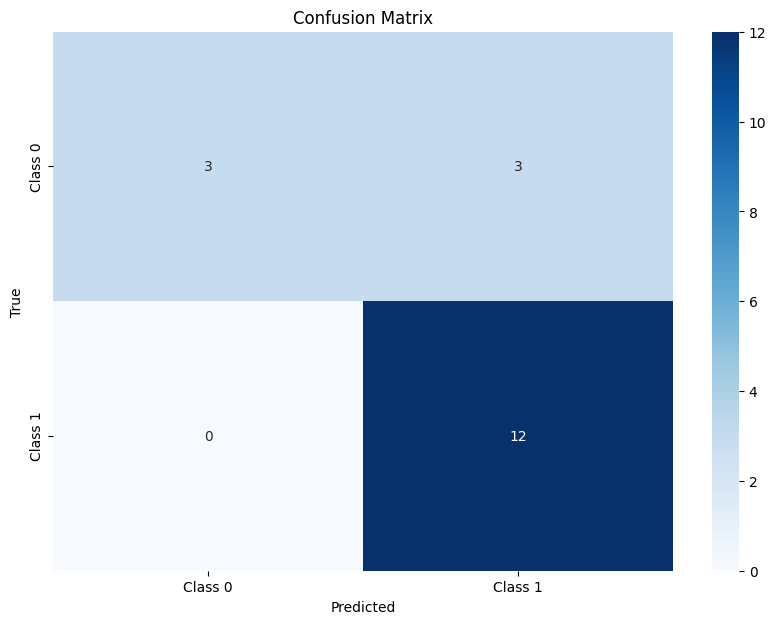

In [16]:
# Calculate the accuracy on the test data
accuracy = logreg_cv.score(X_test, Y_test)
print(f"Accuracy on test data: {accuracy:.2f}")

# Predict the labels for the test set
yhat = logreg_cv.predict(X_test)

# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(Y_test, yhat)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Lets look at the confusion matrix:


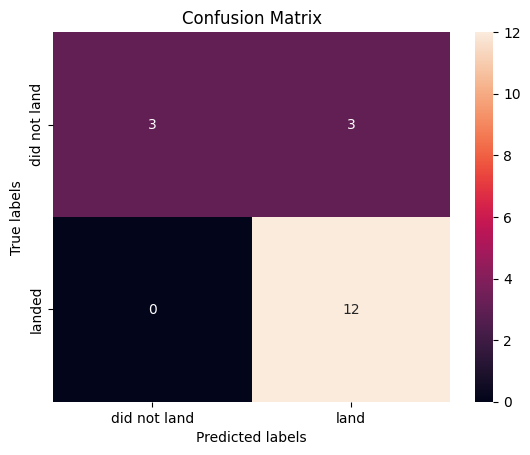

In [17]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [18]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the parameter grid
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# Create a support vector classifier
svm = SVC()

# Create a GridSearchCV object with cv = 10
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the GridSearchCV object to the training data
svm_cv.fit(X_train, Y_train)

# Print the best parameters and accuracy
print("Tuned Hyperparameters : (best parameters) ", svm_cv.best_params_)
print("Accuracy :", svm_cv.best_score_)

Tuned Hyperparameters : (best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy : 0.8482142857142856


In [20]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


Test Accuracy:  0.8333333333333334


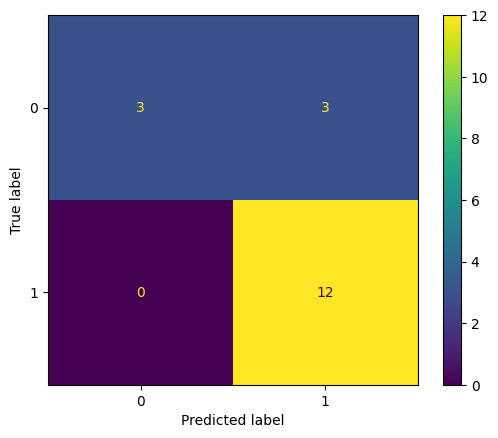

In [21]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the accuracy on the test data
accuracy = svm_cv.score(X_test, Y_test)
print("Test Accuracy: ", accuracy)

# Predict the labels on the test data
yhat = svm_cv.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(Y_test, yhat)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

We can plot the confusion matrix


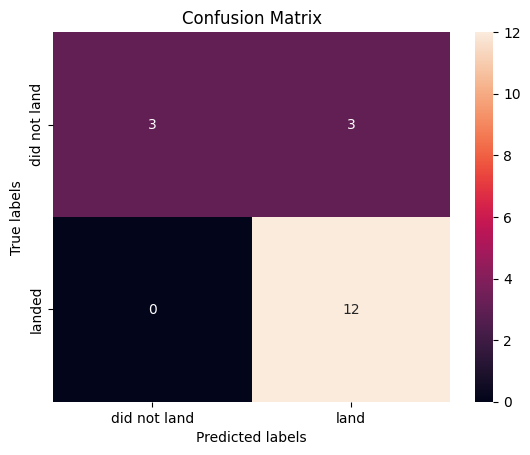

In [22]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [23]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2 * n for n in range(1, 10)],
    'max_features': [None, 'sqrt', 'log2'],  # Removed 'auto' and added 'None'
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create a DecisionTreeClassifier object
tree = DecisionTreeClassifier()

# Create a GridSearchCV object with cv=10
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
tree_cv.fit(X_train, Y_train)

# Print the best parameters and the best score
print("Tuned Hyperparameters: (best parameters) ", tree_cv.best_params_)
print("Accuracy :", tree_cv.best_score_)

Tuned Hyperparameters: (best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
Accuracy : 0.875


In [25]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.875


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


Test Accuracy:  0.9444444444444444


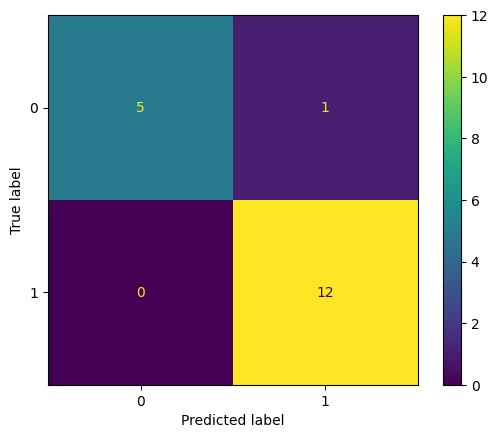

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

# Calculate the accuracy on the test data
accuracy = tree_cv.score(X_test, Y_test)
print("Test Accuracy: ", accuracy)

# Predict the labels on the test data
yhat = tree_cv.predict(X_test)

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(tree_cv, X_test, Y_test)

We can plot the confusion matrix


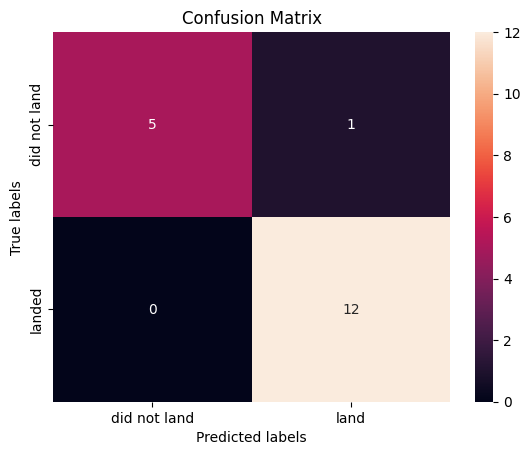

In [27]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [28]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create a K Nearest Neighbors classifier object
KNN = KNeighborsClassifier()

# Create a GridSearchCV object with cv=10
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Fit the object to find the best parameters
knn_cv.fit(X_train, Y_train)

# Print the best parameters and accuracy
print("tuned hyperparameters :(best parameters) ", knn_cv.best_params_)
print("accuracy :", knn_cv.best_score_)

/lib/python3.11/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.11 is maybe too old for this OS.
  warnings.warn(


tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


In [30]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


Test Accuracy:  0.8333333333333334


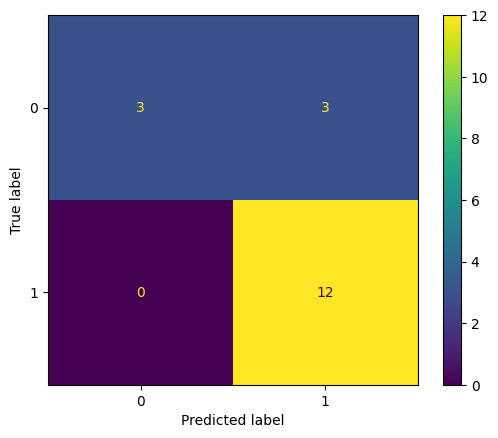

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the accuracy on the test data
accuracy = knn_cv.score(X_test, Y_test)
print("Test Accuracy: ", accuracy)

# Predict the labels on the test data
yhat = knn_cv.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(Y_test, yhat)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

We can plot the confusion matrix


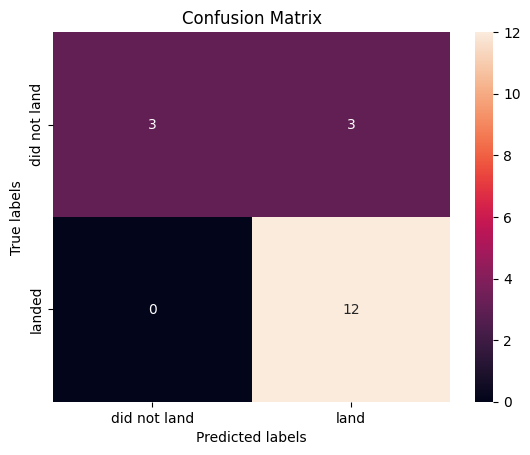

In [32]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [33]:
# Assuming you have stored the accuracy of each model in variables:
logreg_accuracy = logreg_cv.score(X_test, Y_test)
svm_accuracy = svm_cv.score(X_test, Y_test)
tree_accuracy = tree_cv.score(X_test, Y_test)
knn_accuracy = knn_cv.score(X_test, Y_test)

# Print out the accuracy scores
print("Logistic Regression Accuracy: ", logreg_accuracy)
print("Support Vector Machine Accuracy: ", svm_accuracy)
print("Decision Tree Accuracy: ", tree_accuracy)
print("K-Nearest Neighbors Accuracy: ", knn_accuracy)

# Find the best model
accuracies = {
    "Logistic Regression": logreg_accuracy,
    "Support Vector Machine": svm_accuracy,
    "Decision Tree": tree_accuracy,
    "K-Nearest Neighbors": knn_accuracy
}

best_model = max(accuracies, key=accuracies.get)
print("The best performing model is:", best_model)

Logistic Regression Accuracy:  0.8333333333333334
Support Vector Machine Accuracy:  0.8333333333333334
Decision Tree Accuracy:  0.9444444444444444
K-Nearest Neighbors Accuracy:  0.8333333333333334
The best performing model is: Decision Tree


In [34]:
#stored the accuracy of each model in variables:
logreg_accuracy_test = logreg_cv.score(X_test, Y_test)
svm_accuracy_test = svm_cv.score(X_test, Y_test)
tree_accuracy_test = tree_cv.score(X_test, Y_test)
knn_accuracy_test = knn_cv.score(X_test, Y_test)

# Print out the accuracy test scores
print("Logistic Regression Accuracy Test Score: ", logreg_accuracy_test)
print("Support Vector Machine Accuracy Test Score: ", svm_accuracy_test)
print("Decision Tree Accuracy Test Score: ", tree_accuracy_test)
print("K-Nearest Neighbors Accuracy Test Score: ", knn_accuracy_test)

# Find the best model based on accuracy test score
accuracies_test = {
    "Logistic Regression": logreg_accuracy_test,
    "Support Vector Machine": svm_accuracy_test,
    "Decision Tree": tree_accuracy_test,
    "K-Nearest Neighbors": knn_accuracy_test
}

best_model_test = max(accuracies_test, key=accuracies_test.get)
print("The best performing model based on accuracy test score is:", best_model_test)

#stored the GridSearchCV scores in variables:
logreg_gridcv_score = logreg_cv.best_score_
svm_gridcv_score = svm_cv.best_score_
tree_gridcv_score = tree_cv.best_score_
knn_gridcv_score = knn_cv.best_score_

# Print out the GridSearchCV scores
print("Logistic Regression GridSearchCV Score: ", logreg_gridcv_score)
print("Support Vector Machine GridSearchCV Score: ", svm_gridcv_score)
print("Decision Tree GridSearchCV Score: ", tree_gridcv_score)
print("K-Nearest Neighbors GridSearchCV Score: ", knn_gridcv_score)

# Find the best model based on GridSearchCV score
gridcv_scores = {
    "Logistic Regression": logreg_gridcv_score,
    "Support Vector Machine": svm_gridcv_score,
    "Decision Tree": tree_gridcv_score,
    "K-Nearest Neighbors": knn_gridcv_score
}

best_model_gridcv = max(gridcv_scores, key=gridcv_scores.get)
print("The best performing model based on GridSearchCV score is:", best_model_gridcv)

Logistic Regression Accuracy Test Score:  0.8333333333333334
Support Vector Machine Accuracy Test Score:  0.8333333333333334
Decision Tree Accuracy Test Score:  0.9444444444444444
K-Nearest Neighbors Accuracy Test Score:  0.8333333333333334
The best performing model based on accuracy test score is: Decision Tree
Logistic Regression GridSearchCV Score:  0.8464285714285713
Support Vector Machine GridSearchCV Score:  0.8482142857142856
Decision Tree GridSearchCV Score:  0.875
K-Nearest Neighbors GridSearchCV Score:  0.8482142857142858
The best performing model based on GridSearchCV score is: Decision Tree


Based on the evaluation of four different machine learning models using their accuracy scores on the test data, we have identified the following results:

### Accuracy Test Scores
- **Logistic Regression Accuracy Test Score:** 0.8333
- **Support Vector Machine Accuracy Test Score:** 0.8333
- **Decision Tree Accuracy Test Score:** 0.9444
- **K-Nearest Neighbors Accuracy Test Score:** 0.8333

### Best Model Based on Accuracy Test Score
- **The best performing model based on accuracy test score is:** Decision Tree

### GridSearchCV Scores
- **Logistic Regression GridSearchCV Score:** 0.8464
- **Support Vector Machine GridSearchCV Score:** 0.8482
- **Decision Tree GridSearchCV Score:** 0.8750
- **K-Nearest Neighbors GridSearchCV Score:** 0.8482

### Best Model Based on GridSearchCV Score
- **The best performing model based on GridSearchCV score is:** Decision Tree

### Summary
- **Decision Tree** outperformed the other models in both accuracy test score and GridSearchCV score.
  - **Accuracy Test Score:** Indicates that the Decision Tree correctly predicted the outcomes in 94.44% of the test cases.
  
### Interpretation
- **Overall Model Performance:**
  - The Decision Tree model demonstrates superior performance, suggesting it is the most effective model for predicting whether the Falcon 9 first stage will land successfully.
  - Logistic Regression, SVM, and KNN models performed consistently but did not achieve the same level of accuracy as the Decision Tree.

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
